In [10]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread("depth_image.png")

# Define the cropping coordinates (x1, y1, x2, y2)
x1, y1, x2, y2 = 550, 100, 1500, 1242  # Adjust these values as needed

# Crop the image using slicing
cropped_image = original_image[y1:y2, x1:x2]

# Display the cropped image
cv2.imshow("Cropped Image", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

# Load the depth image (in grayscale)
original_image = cv2.imread("depth_image.png", cv2.IMREAD_GRAYSCALE)

#crop
x1, y1, x2, y2 = 550, 100, 1500, 1242 
depth_image = original_image[y1:y2, x1:x2]

# Define the conversion factor from depth values to physical units (e.g., millimeters to meters)
depth_scale = 0.001  # Adjust this as needed

# Threshold the depth image to segment the object
# You may need to adjust the threshold value based on your specific depth image
threshold_value = 70  # Adjust this threshold as needed
binary_mask = (depth_image > threshold_value).astype(np.uint8)

# Calculate the volume of the segmented object
# Assuming the depth values are in meters, you can calculate the volume in cubic meters
voxel_volume = depth_scale ** 3
occupied_voxels = np.count_nonzero(binary_mask)
food_volume = voxel_volume * occupied_voxels

food_volume_ml = food_volume * 1e6

print(f"Volume of the food: {food_volume_ml} milli litres")


Volume of the food: 1001.9010000000002 milli litres


In [4]:
import cv2
import numpy as np

# Load the depth image (in grayscale)
depth_image = cv2.imread("depth_image.png", cv2.IMREAD_GRAYSCALE)

# Define the conversion factor from depth values to physical units (e.g., millimeters to meters)
depth_scale = 0.001  # Adjust this as needed (converts mm to meters)

# Threshold the depth image to segment the food object
# You may need to adjust the threshold value based on your specific depth image
threshold_value = 100  # Adjust this threshold as needed
food_mask = (depth_image > threshold_value).astype(np.uint8)

# Calculate the image center and the radius for 80% coverage
image_height, image_width = depth_image.shape[:2]
center_x, center_y = image_width // 2, image_height // 2
radius = min(center_x, center_y) * 0.8  # 80% of the minimum dimension

# Create a circular mask for the plate region (a black circle)
plate_mask = np.zeros_like(depth_image, dtype=np.uint8)
cv2.circle(plate_mask, (center_x, center_y), int(radius), 255, -1)  # 255 indicates a white circle

# Invert the plate mask to select the non-plate region
non_plate_mask = 255 - plate_mask

# Apply the non-plate mask to the food mask to exclude the plate
food_mask = cv2.bitwise_and(food_mask, non_plate_mask)

cv2.imshow("Masked Food Image", food_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Calculate the volume of the segmented food object in cubic meters
voxel_volume = depth_scale ** 3
occupied_voxels = np.count_nonzero(food_mask)
food_volume_m3 = voxel_volume * occupied_voxels

# Convert the volume to milliliters (1 cubic meter = 1,000,000 milliliters)
food_volume_ml = food_volume_m3 * 1e6

print(f"Volume of the food (excluding plate): {food_volume_ml} milliliters")


Volume of the food (excluding plate): 1394.278 milliliters


#Threshold Adjustment


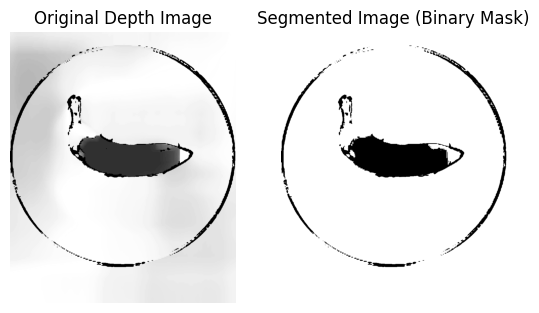

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the depth image (in grayscale)
# Load the depth image (in grayscale)
original_image = cv2.imread("depth_image.png", cv2.IMREAD_GRAYSCALE)

#crop
x1, y1, x2, y2 = 550, 100, 1500, 1242 
depth_image = original_image[y1:y2, x1:x2]
# Define the conversion factor from depth values to physical units (e.g., millimeters to meters)
depth_scale = 0.001  # Adjust this as needed

# Threshold the depth image to segment the object
# You may need to adjust the threshold value based on your specific depth image
threshold_value = 70  # Adjust this threshold as needed
binary_mask = (depth_image > threshold_value).astype(np.uint8)

# Display the original depth image
plt.subplot(1, 2, 1)
plt.imshow(depth_image, cmap='gray')
plt.title('Original Depth Image')
plt.axis('off')

# Display the segmented image (binary mask)
plt.subplot(1, 2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Segmented Image (Binary Mask)')
plt.axis('off')

plt.show()
